In [3]:
# installations
!pip install --upgrade pip

!python --version
!pip3 install jedi==0.16


!pip3 uninstall cvxpy -y > /dev/null
!pip3 install setuptools==65.5.0 pip==22.2 > /dev/null
# hack for gym==0.21.0 https://github.com/openai/gym/issues/3176
!pip3 install torch==1.13.1 torchvision==0.14.1 diffusers==0.11.1 \
scikit-image==0.19.3 scikit-video==1.1.11 zarr==2.12.0 numcodecs==0.10.2 \
pygame==2.1.2 pymunk==6.2.1 gym==0.21.0 shapely==1.8.4 dnn \
&> /dev/null # mute output
!pip install --upgrade "jax[cuda12_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html &> /dev/null
# This will take a while, and do not worry if you get some warnings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

%load_ext autoreload
%autoreload 2

import os
#change to desired path to the part2-DiffusionModels folder
os.chdir("./drive/MyDrive/homework4/part2-DiffusionModels")
%pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/homework4/part2-DiffusionModels'

In [4]:
from tests import TestCases
unit_tester = TestCases()

ImportError: ignored

# Homework 4: Part 2 - Diffusion Models [30 points + 3 Extra Credit]

Denoising Diffusion Probabilistic Models (DDPM) - https://arxiv.org/abs/2006.11239/ \
Classifier Free Guidance (CFG) - https://arxiv.org/abs/2207.12598

In this part of the assignment you will be implementing a diffusion model and applying it in two different domains - a robotics task and an image generation task.  Denoising Diffusion Probabilistic Models (DDPMs), also known as Diffusion Models, are state of the art generative models that train a network to itteratively denoise random gaussian noise.  If you have not done so already, please read through the DDPM paper linked above in order to get an understanding of the math behind DDPMs.  The code for this part of the assignment is not particularly difficult, but you will have a difficult time if you do not understand the theory behind diffusion models.  You will also be implementing classifier free guidance (CFG).  While the CFG paper does not have to be read as thoroughly as the DDPM paper, it is definitely a useful read if you are not familiar with CFG.

#### Creating the DDPM

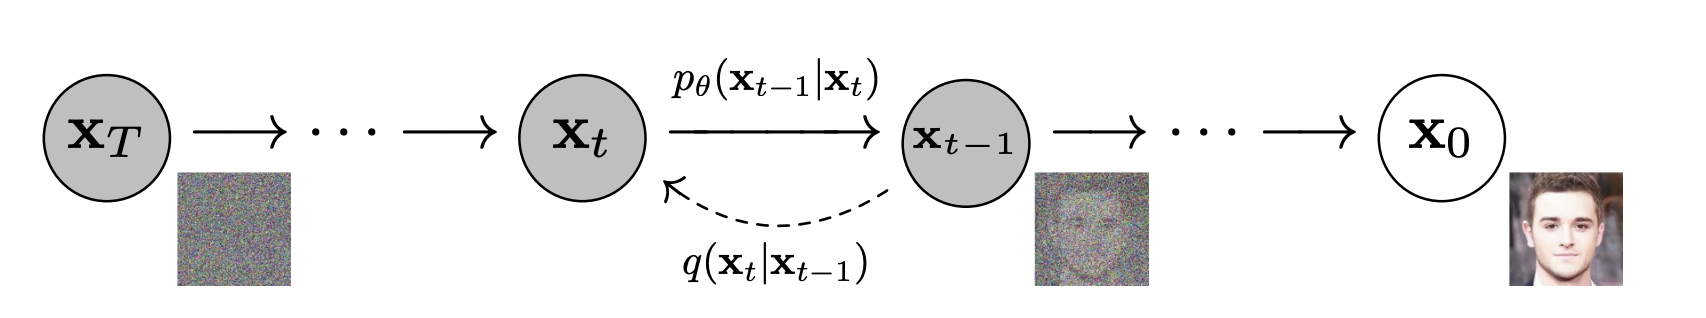

For the sake of this assignment, we are breaking the Diffusion Model into two parts.  A noise scheduler and a noise prediction net.  The noise scheduler handles the noise addition during the forward process and the noise removal during the reverse process.  The noise prediction net is a neural network that predicts the amount of noise that should be removed at each denoising step.  Transformers, like the one you implemented in the last assignment, can be used as this noise prediction network.  For this assignment we are using a U-Net as opposed to a transformer, but you will not be implementing this model, just training it.

### IMPORTANT NOTE FOR IMPLEMENTATION!

You will be generating random numbers in various sections of this project.  To keep the outputs deterministic for unit test and auto grader purposes, you <u>must</u> use our prebuilt randomizer function.  This randomizer is defined in ```part2-DiffusionModels/randomizer.py```.  Please take a look at that function before you start coding.  The function that we define is sufficient for generating any random numbers that you will need for this project.    Do not worry about passing in seeds for the robotics section (2.4)

### IMPORTANT NOTE 2
The equations in the DDPM paper describe an unconditional model, you will be implementing a conditional model.  This does not significantly change the equations, you just need to pass in the conditioning term along with $x$ and $t$.  Make sure to watch the first lecture on generative models if you are running into confusion about this or other aspects of Diffusion Models.

## Part 2.1 - Noise Scheduler [6 points]
**2.1.1** - Forward Process (Adding Noise) [3 points] [.5 writeup points]

During the forward process, we take an input and gradually add Gaussian noise to the data according to a variance schedule.  This is described in section 2, background, of the DDPM paper.  You must read that section to complete this part of the assignment.


**TODO:** Complete initialization function in ```part2-DiffusionModels/noise_scheduler.py```

**TODO:** Implement ``add_noise`` function in ``part2-DiffusionModel/noise_scheduler.py``
\
\
_Hint:_ Pay attention to equation 4
\
\
<u>Question:</u> what does $q(x_t|x_o)$ represent for a diffusion model? (read the paper)

<u>Answer: It is the closed form solution to sample an arbitrary xt from x0. </u>  

In [ ]:
# test initialization
unit_tester.test_noise_scheduler_init()
# test add noise
unit_tester.test_add_noise()


NoiseScheduler() initialization test case passed!
add_noise() test case passed!


**2.1.2** - Reverse Process (Removing Noise) [2.5 point]

When taking a step during the backwards process, we have access to a partially noised sample $x_t$, the denoising timestep $t$, and our model's noise prediction.  We remove the predicted noise to get a slightly less noisy sample $x_{t-1}$.  The completely uncorrupted sample is recovered at $x_0$.  This process is described in detail in section 3 of the DDPM paper, please read this section before completing this part of the assignment.

*TODO:* Implement ``denoise_step`` function in ``part2-DiffusionModels/noise_scheduler.py`` (do not implement the thresholding part yet)
\
\
_Hint:_ Pay attention to algorithm 2 - Sampling

In [ ]:
# test denoise step
unit_tester.test_denoise_step()


AssertionError: ignored

## Part 2.2 - Constructing the Diffusion Model [7 Points]

We have provided you with a noise prediction network, and you have just written a noise scheduler.  With these two parts you are able to put together a completed diffusion model.

*2.2.1* Compute Loss for Training [2 points] [.5 writeup points]
\
\
For this part of the assignment, you will be implementing the ``compute_loss_on_batch`` function of the diffusion model.  We have implemented the rest of the training logic for you. Keep in mind, the only part of the diffusion model that needs to be trained is the noise prediction network.  Your loss function should capture how well the noise_pred_net estimates the added noise.  We expect you to implement the simplified variant of the variational lower bound as described in section 3.4 of the DDPM paper.

*TODO:* Implement loss computation section of ``compute_loss_on_batch`` function in ``part2-DiffusionModels/diffusion_model.py``
\
\
_Hint:_ Use your noise scheduler, refer to equation 14 and Algorithm 1 - Training
\
_Hint:_ For each item in the batch, you should be selecting a random timestep $t$ to compute the loss
\
\
<u>Question:</u> What is $\epsilon_\theta(\sqrt{\bar{\alpha_t}}x_0 + \sqrt{1 - \bar{\alpha_t}}\epsilon, t)$ ?

<u> Answer: The expression represents the learned gradient of the data density. It is a step towards finding the optimal noise distribution. </u>  

In [ ]:
# test loss computation
unit_tester.test_compute_loss_on_batch()

compute_loss_on_batch() test case passed!


2.2.2 Classifier Free Guidance [1 Point]

We want our diffusion model to make use of classifier free guidance.  If you are not familiar with classifier free guidance, please take a look at the CFG paper now.  Classifier free guidance allows us to variably combine noise predictions from a conditional and an unconditional noise prediction network at inference time.  This has the effect of enhancing class specific features and is critical for high quality image generation.  In practice, we train the unconditional noise prediction net at the same time as the conditional noise prediction net.  Section 3.2 of the CFG paper describes this process.  

<u>We expect you to use 0s as the null tokens. </u>
\
\
*TODO:* Implement classifier free guidance section of ``compute_loss_on_batch`` function in ``part2-DiffusionModels/diffusion_model.py``
\
\
_Hint:_ This should only be a few lines, use self.p_uncond

In [ ]:
# test classifier free guidance training
unit_tester.test_compute_loss_with_cfg()


compute_loss_with_cfg() test case passed!


2.2.3 Sample Generation (with classifier free guidance) [3.5 points]

Before we can actually use our diffusion model, we need to write the code for generating a sample.  To generate an output, we draw a sample $x_T$ from random gaussian noise.  We then itteratively denoise the random output for T denoising timesteps until we get our uncorrupted output $x_0$.  You will be implementing sampling with classifier-free guidance.  Do not worry about replicating algorithm 2 of the CFG paper, we only expect you to calculate the updated noise prediction from equation 6 of the CFG paper:$$ \bar{\epsilon_\theta}(x_t, t, c) = (1 + w) * \epsilon_\theta(x_t, t, c) - w * \epsilon_\theta(x_t, t, \empty) $$

where $\epsilon_\theta$ is the predicted noise from your noise prediction network and $w$ is the guidance weight

*TODO:* Implement ``generate_sample`` function in ``part2-DiffusionModels/diffusion_model.py``
\
\
_Hint:_ Use your noise scheduler and refer to Algorithm 2 - Sampling of the DDPM paper \
_Hint:_ Dont forget that this is a conditional model and to include classifier free guidance

In [ ]:
# test generate sample
unit_tester.test_generate_sample()


AssertionError: ignored

## Part 2.3 - Diffusion Model Applications (Computer Vision) [7 points]

Diffusion models are mostly known in popular culture because of image generation tools such as Dall-e and Midjourney.  These models are able to take in text based prompts and output extremely realistic photos.  For the sake of this assignment we will not be implementing anything that is nearly as visually impressive, but we hope to shed some insight on a few critical aspects to state of the art diffusion models.  Namely classifier free guidance and thresholding.  You will be working with a subset of the CIFAR-10 dataset.  The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class.  We will be working with the first three classes of this dataset - airplanes, automobiles, and birds.

<!-- <img src="assets/CIFAR.png" alt="CIFAR" style="width:500px" /> -->

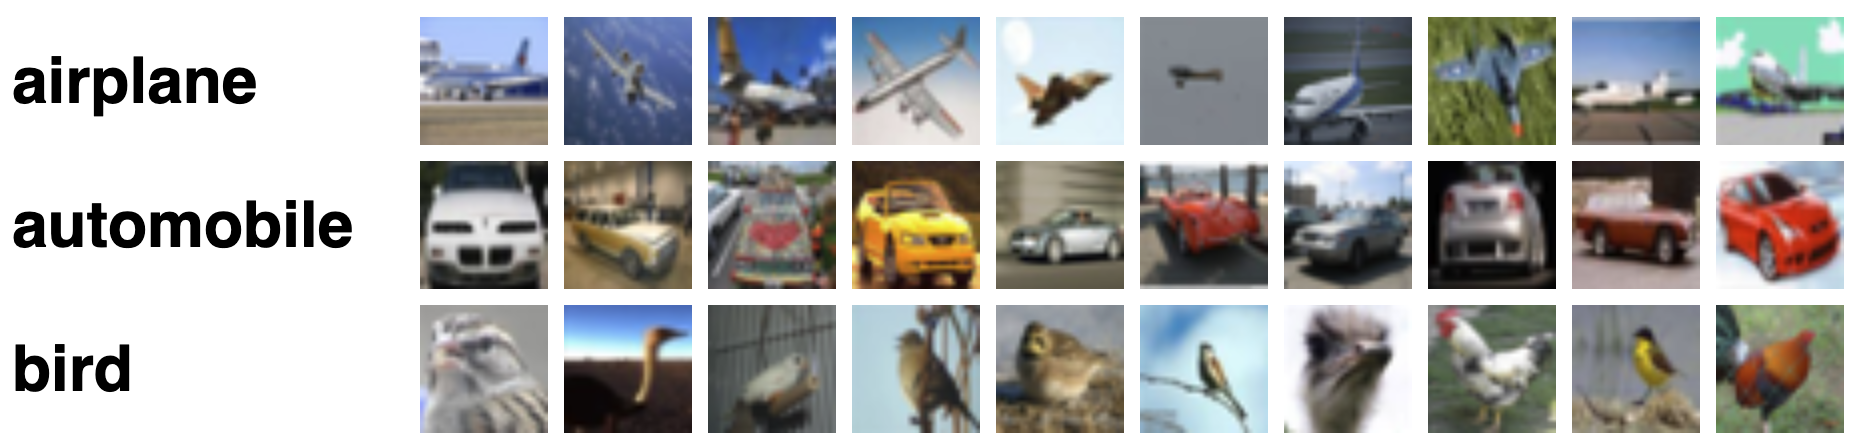

In [ ]:
# Imports and global function definitions
from computer_vision.image_gen import ImageGenerator
from matplotlib import pyplot as plt

def plot_image(output):
    B, H, W, C = output.shape
    # batch size divided by number of classes
    num_cols = B // 3
    assert B % 3 == 0
    fig, axes = plt.subplots(3, num_cols, figsize=(12, 8))
    # Loop through the rows
    for i in range(3):
        # Loop through the columns
        for j in range(B // 3):
            image = output[i * (B // 3) + j]
            if num_cols == 1:
                axes[i].imshow(image)
                axes[i].axis('off')
            else:
                axes[i, j].imshow(image)
                axes[i, j].axis('off')

    # label the first row "airplane", the second row "automobile", and the third row "bird"
    axes[0, 0].set_title('airplane')
    axes[1, 0].set_title('automobile')
    axes[2, 0].set_title('bird')

    plt.show()

In [ ]:
# Run this cell to download the dataset, only needs to be done once even if you restart the notebook
%cd computer_vision
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz
%cd ..

/content/drive/MyDrive/homework4/part2-DiffusionModels/computer_vision
--2023-11-16 19:58:23--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  21.0MB/s    in 8.4s    

2023-11-16 19:58:31 (19.3 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
/content/drive/MyDrive/homework4/part2-DiffusionModels


*2.3.1* Initialization and Data Augmentation [2 writeup points]

In parts 2.1 and 2.2 you implemented diffusion model training and sample generation, so the majority of the work for generating images is done!  The computer_vision/image_gen.py file handles the rest of the logic for image generation.  Your first task is to complete the initialization function, this is only a few lines of code.
\
\
*TODO:* Complete initialization function in ``part2-DiffusionModels/computer_vision/image_gen.py``

In [ ]:
generator = ImageGenerator()

After initializing the image generator, take a look through the rest of the file to understand how the data is loaded and how the images are generated.  Your next task is to perform data augmentation on the CIFAR dataset (for the sake of training time we do not require you to actually add augmenations and increase the size of your dataset, but go through this exersize with us anyway).  This is a common technique in the computer vision world as it allows us to increase the size of our dataset and train the model to be invariant to certain perturbations. You may have done this before when training a classification model, but now we are training a generator.  The types of augmentations that we want our generator to be invariant to are not necessariliy the same as for a classifier.

<u> Question: </u> _Why might we want a classifier to be invariant to different augmentations then a generator?  Name 2 augmentations that we might perform on a classification dataset that we don't want to perform on a dataset for a generative model.  Name 2 augmentations that you want to perform on a dataset for a generative model (its okay if you want also want to do the same augmentations on a classification dataset)._

<u> Your Answer Here: </u> A generator should not be invariant since we want different patterns in our data to have different outputs for a generator. A classifier however, should be robust to variations in data so it needs to be invariant. 2 augmentations to perform on a classification dataset are cropping and masking. These two techniques can remove important features for generative models but a classifier should learn to classify these iamges. 2 augmentations for a generative model could be rotating the image or shifting the pixels in a certain direction.

*OPTIONAL:* Implement two augmentations in the ``load_dataset`` function of ``part2-DiffusionModels/computer_vision/image_gen.py``,  (these should be the augmentations you described above). Increasing the dataset size will slow down your training, so we do not require you to actually implement these augmentations.  However, we have left room for you to add the code for augmentation if you have the time or compute.  \
*OPTIONAL:* Display an image from the CIFAR dataset and show it after the augmentations (3 images total: original, augmentation 1, augmentation 2)

In [ ]:
# Feel free to add more cells or generate the images separately and display them as a Markdown cell

*2.3.2* Image Generation and Classifier Free Guidance [1 writeup point]

Now it is time to train the model - if this fails to run, go and check over your previous work.
We are implementing a small model, but even still, this will take a while to train!  Please use google colab if you do not have access to a GPU.  The remainder of this assignment will be infeasable for you if you do not have a GPU.  That being said, we understand that you have time constraints and we do not expect you to let this model train for hours (although your results would look much better if you did).

We ask that you budget 30 minutes for the training of this image generation model, you can run it for longer if you prefer though.  Do not stress too much about the specific images generated, we know the outputs will be poor given your limited computation budget.  If your loss isnt decreasing (should get below 0.1 after ~7 epochs of training and below 0.05 by the end of training) or you are generating random noise, then you may have a serious issue.  But if your airplane is a smudge on a blue-ish background, that is a great output.  The goal is for you to learn, we will be paying much more attention to your analysis than your images.  

In [ ]:
generator.load_dataset(dataset_paths=[
    'computer_vision/cifar-10-batches-py/data_batch_1',
    'computer_vision/cifar-10-batches-py/data_batch_2',
    'computer_vision/cifar-10-batches-py/data_batch_3',
    'computer_vision/cifar-10-batches-py/data_batch_4',
    'computer_vision/cifar-10-batches-py/data_batch_5',
    ], batch_size = 64
     )

In [ ]:
# You can just rerun this cell to keep training the model

# Keep the number of epochs at 25 for now (if you need it to be smaller that is okay as well)
# You will have a chance to increase the training time and generate your best images at the end of this section
generator.train_policy(epochs=50)
generator.policy.save_weights('model_pths/image_weights.pth')

# Load the model from the checkpoint
# generator.policy.load_weights('model_pths/image_weights.pth')
# generator.load_dataset(dataset_paths=[
#     'computer_vision/cifar-10-batches-py/data_batch_1',
#     'computer_vision/cifar-10-batches-py/data_batch_2',
#     'computer_vision/cifar-10-batches-py/data_batch_3',
#     'computer_vision/cifar-10-batches-py/data_batch_4',
#     'computer_vision/cifar-10-batches-py/data_batch_5',
#     ], batch_size = 64
#      )

[autoreload of robotics.dataset failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/content/drive/MyDrive/homework4/part2-DiffusionModels/robotics/dataset.p

First, you will evaluate the output of unguided image generation.  The generate_images will produce num_samples generations of each class.

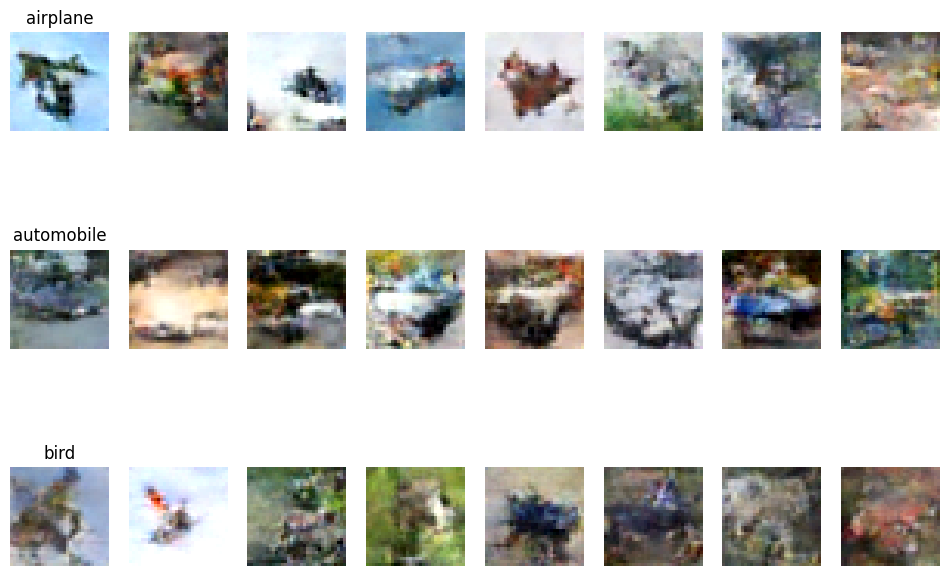

In [ ]:
image = generator.generate_images(guidance=0, num_samples=8)
plot_image(image)

<u> Question: </u>  What do you notice about the quality of unguided image generation?  How effectively is the model learning each class? This is very early in the training process, but do you notice any features that the model is learning for each class?

<u> Your Answer Here: </u> The images are blurry and seem to somewhat resemble the shape of the class in some images and the colors of the backgrounds also make sense. The model seems to be somwhat effective. I used 35 epochs instead of 25 and that seemed to help. The model seems to be learning at least the shape of the object in the class and also what type of background would be appropriate for the object.

Now, we will evaluate image generation with different guidance weights.  To do this, we dont actually need to retrain the model at all, this guidance can be done purely at inference time. Great!  Explain why we dont have to retrain for image guidance.

<u> Your Answer Here: </u>  Guidance will only be used for ingerence. The model has already been trained to predict how much noise to remove at each time step. The guidance is just there for us to determine how much of the conditional do we want when reconstructing at each step.

In [ ]:
generator.policy.load_weights('model_pths/image_weights.pth')

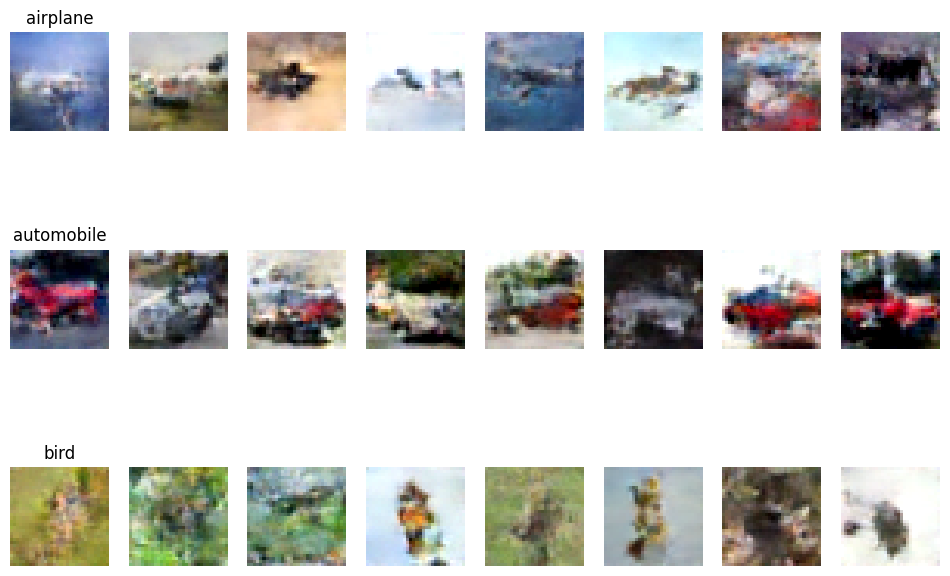

In [ ]:
image = generator.generate_images(guidance=0.5, num_samples=8)
plot_image(image)

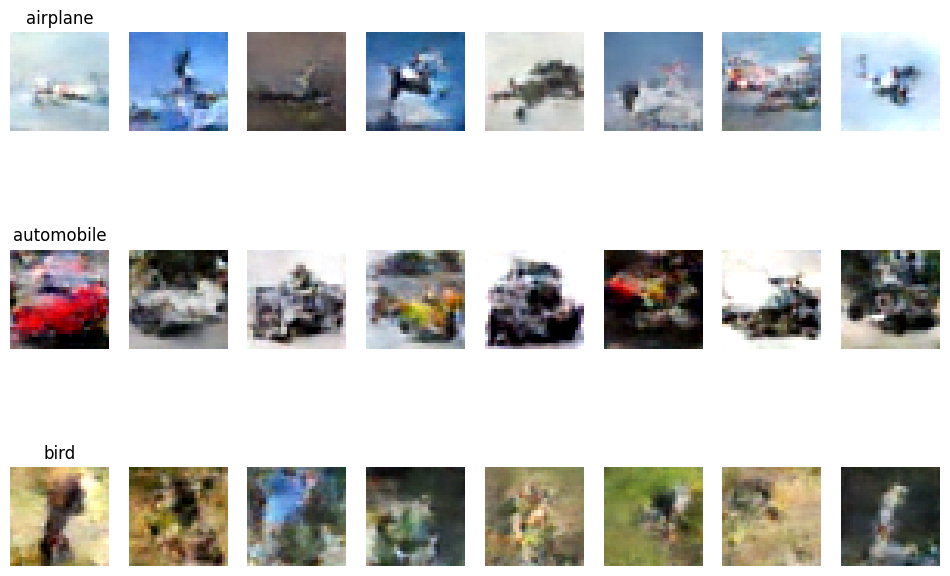

In [ ]:
image = generator.generate_images(guidance=1, num_samples=8)
plot_image(image)

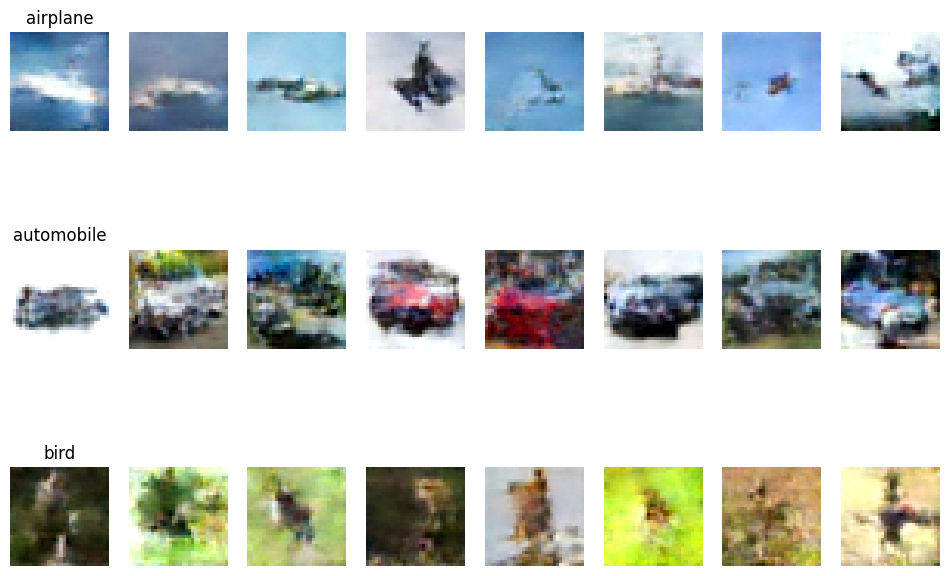

In [ ]:
image = generator.generate_images(guidance=2, num_samples=8)
plot_image(image)

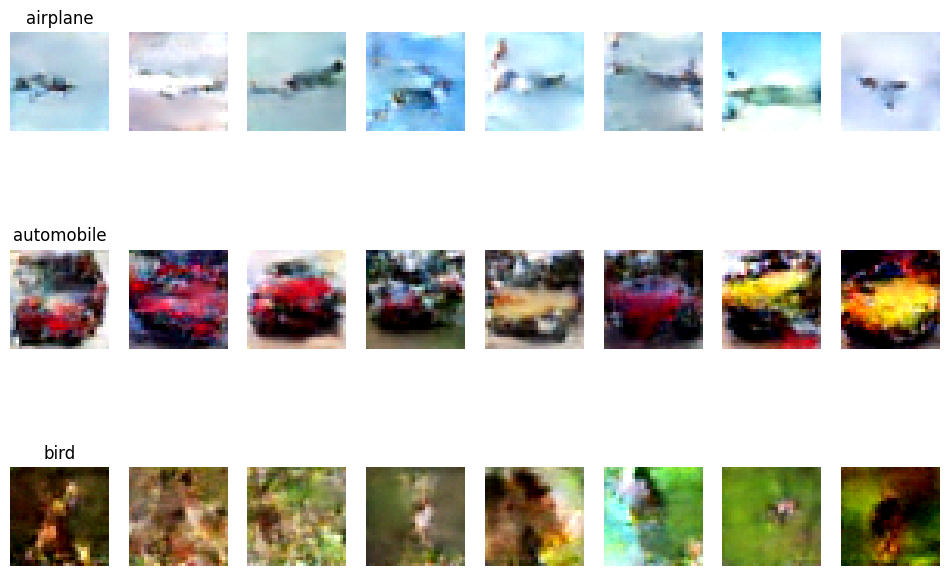

In [ ]:
image = generator.generate_images(guidance=5, num_samples=8)
plot_image(image)

<u> Question :</u>  What do you notice about the generations with classifier free guidance?  What features does the model pick up as being most indicattive of each class?  Does performance degrade as guidance increases? If so, how?

<u> Your Answer Here :</u> The generations have more clarity and you can make out what the object actually is. The features the model seems to pick is the color of the background to represent where the object is and also the color scheme of the object along with the outline of the object. The performance of guidance improves as guidance increases but struggles with the bird class since there are more details to that image. If we keep increasing the guidance the quality does decrease however if we set guidance to 20.  

*2.3.3* Thresholding [2 points] + [3 writeup points]

You may have noticed that with high guidance weights, the images tend to oversaturate.  This is because the model is predicting values outside of the range [-1, 1] (our input is normalized to this range before being passed to the model).  To help mitigate this, it is common to threshold sample predictions at each denoising step.  As our denoising step is currently implemented, we can't actually use this technique. This is because we directly estimate $x_{t-1}$.  Why shouldn't we just threshold $x_{t-1}$ to be within [-1, 1]?  Additionally, why is thresholding particularly useful when dealing with large guidance weights?  Will thresholding have an effect even if we don't have a large guidance weight?

<u> Your Answer Here: </u> Constraining the output to [-1,1] could remove important information when learning the noise distribution. Thresholding is useful for larger guidance weights since the model's prediction may be too extreme and be extremely oversaturated. It is analogaous to regularization where we want to have some control on our predictions. Yes but the effect will not be as large since the values will not be that as extreme without guidance.

So we need to compute $x_{t-1}$ such that we estimate $x_{0}$ as an intermediate step.  This way we can threshold our estimate of $x_{0}$.  
<u> This is shown in equations (6) and (7) of the DDPM paper.  The equation for computing an estimate of $x_0$ is shown in equation (15).  Make sure to threshold the prediction of $x_0$! </u>

*TODO:* Implement denoising with thresholding in the ``denoise_step`` function in ``part2-DiffusionModels/noise_scheduler.py``

In [ ]:
# test denoise step with thresholding
unit_tester.test_threshold_denoise_step()

AssertionError: ignored

Now that you have completed the thresholding, evaluate how this changes image generation with different guidance weights.

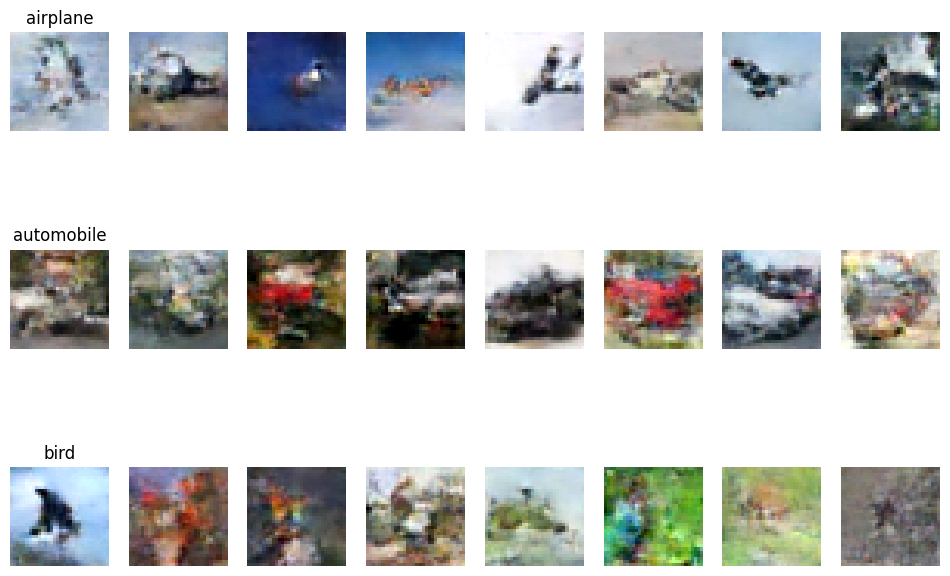

In [ ]:
image = generator.generate_images(guidance=0, num_samples=8, threshold=True)
plot_image(image)

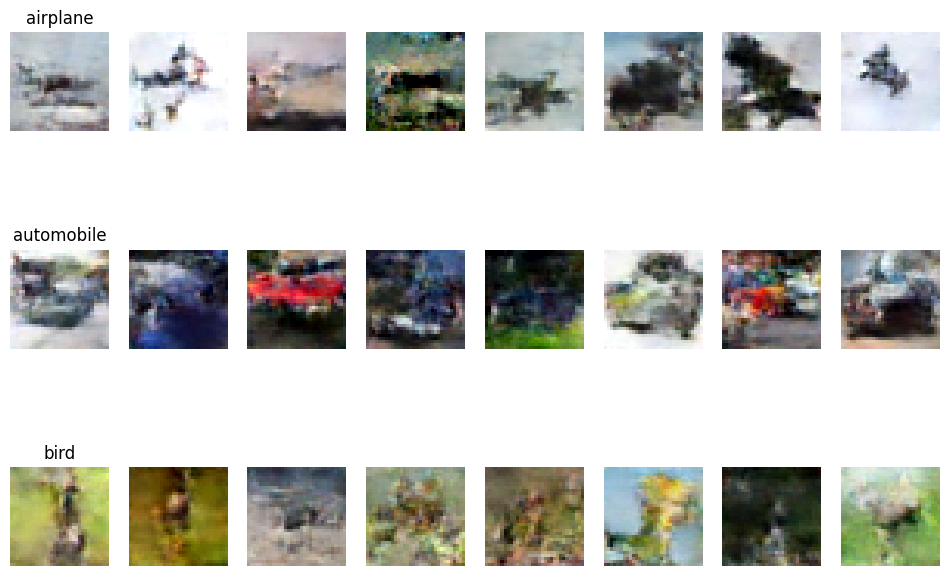

In [ ]:
image = generator.generate_images(guidance=0.5, num_samples=8, threshold=True)
plot_image(image)

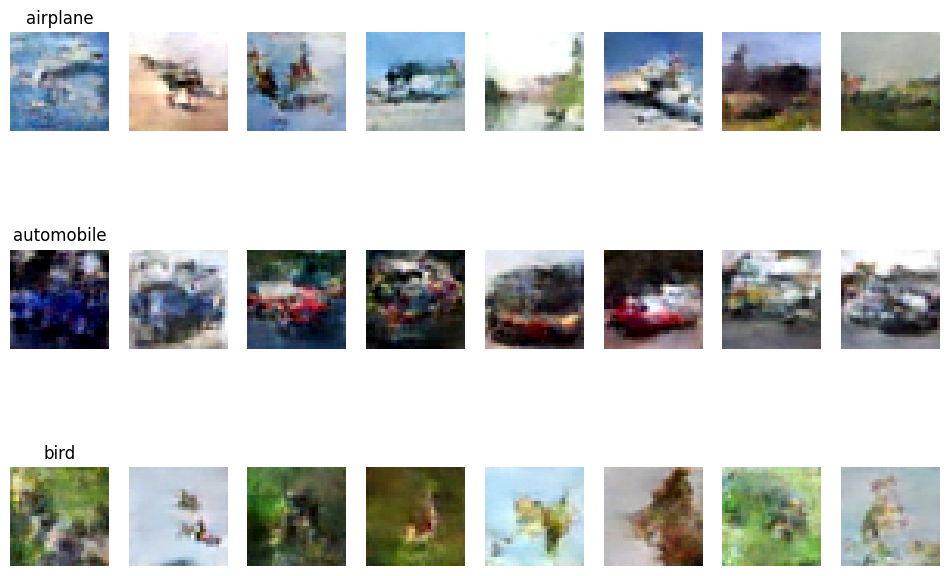

In [ ]:
image = generator.generate_images(guidance=1, num_samples=8, threshold=True)
plot_image(image)

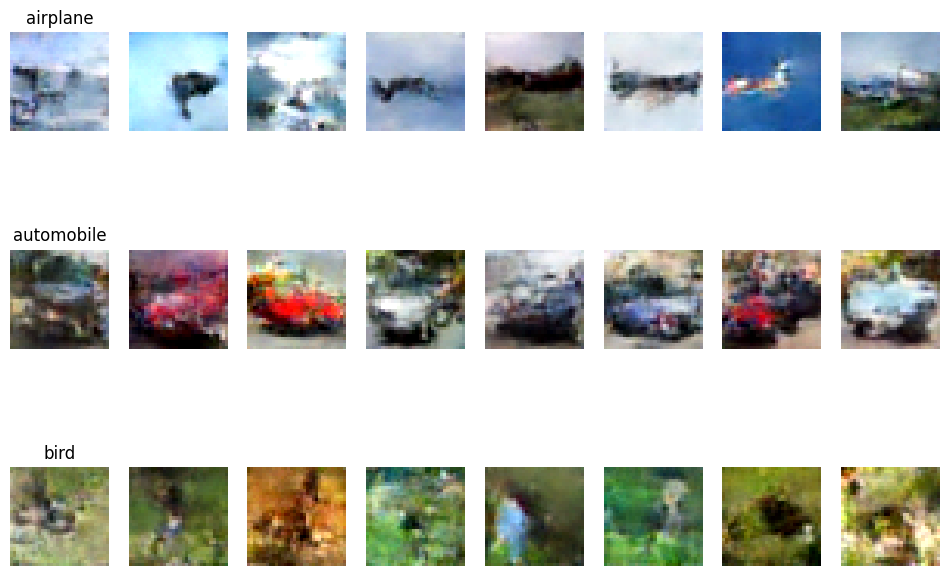

In [ ]:
image = generator.generate_images(guidance=2, num_samples=8, threshold=True)
plot_image(image)

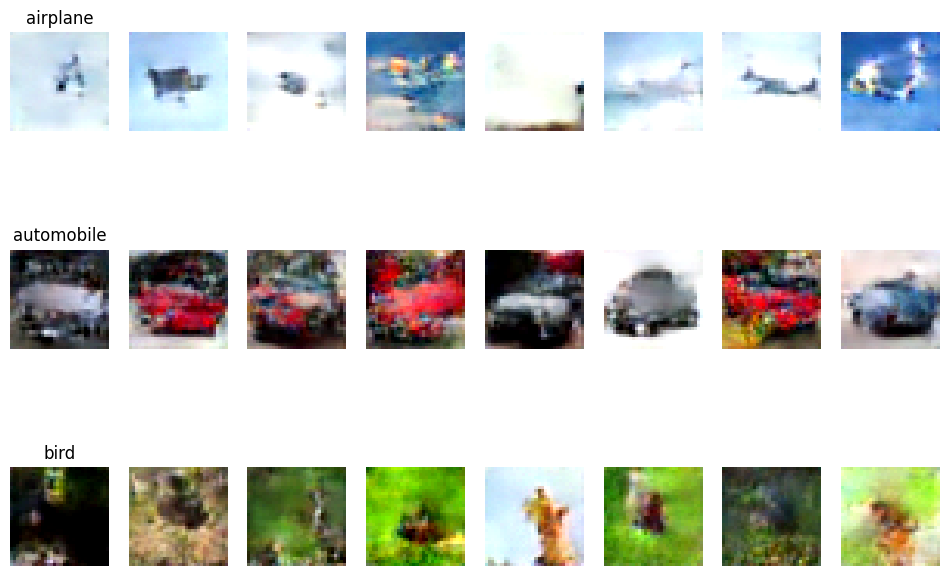

In [ ]:
image = generator.generate_images(guidance=5, num_samples=8, threshold=True)
plot_image(image)

<u> Question: </u> How do the results after thresholding compare to the results before thresholding?  With thresholding and high guidance weight, which class specific features are most prominant?  Which set of parameters gave you the best output?

<u> Your Answer Here:</u> The images seem to be more defined and the colors do not mesh together as much. All of the colors in the images seem normal and the hood of the car for the car class seems more defined. The plain colors also seem to fit normally with the sky. I think guidance of 2 gave the best results.

*TODO:* Experiment with different training times and guidance weights!  Try and get the best image possible (or show something else interesting).  You need at least two more generations, feel free to do more are welcome though.

[autoreload of robotics.dataset failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/content/drive/MyDrive/homework4/part2-DiffusionModels/robotics/dataset.p

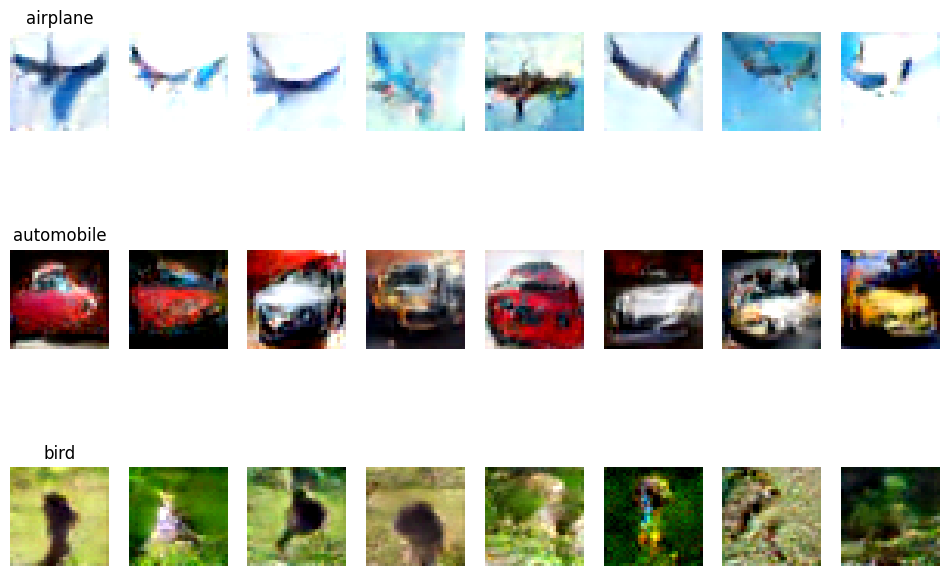

In [ ]:
# room for experimentation
image = generator.generate_images(guidance=10, num_samples=8, threshold=True)
plot_image(image)

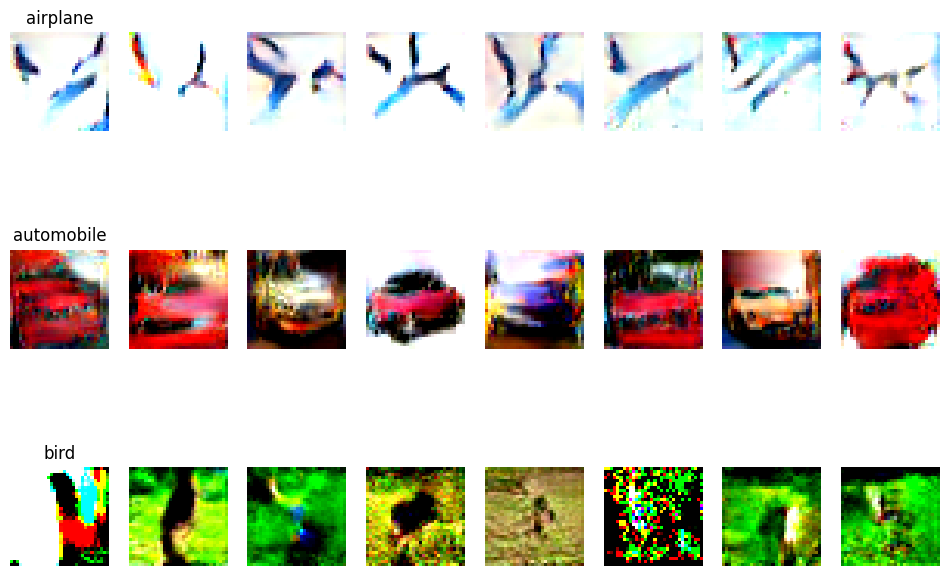

In [ ]:
image = generator.generate_images(guidance=20, num_samples=8, threshold=True)
plot_image(image)

## Part 2.4 - Diffusion Model Applications (Robotics) [9 points]

Diffusion models are frequently used in the image generation domain, but they are also very effective policy generators.  In the context of deep learning for robotics, we think of a policy $\pi(a | s)$ as a deep neural network that models the action, $a$, an agent can take given it's current state, $s$ (its current observation of the world).  Lets assume we have access to a set of demonstrations $D = \{\tau_i\}^N_{i=1}$ where each $\tau_i$ is a trajectory such that $\tau_i = \{s_n, a_n\}^{len(\tau_i)}_n$.  That is to say, our demonstration dataset will contain a set of states and the corresponding actions that our agent has taken from those states.  If we train a policy to model this distribution of actions given the current state, then we should be able to imitate what was demonstrated.  For this project, we will be using a diffusion model as our policy.  Here are some papers that have used diffusion models as robot policies if you are interested in reading more (you are not required to read these papers to complete this section of the project):

Diffuser - https://arxiv.org/abs/2205.09991 \
Decision Diffuser - https://arxiv.org/abs/2211.15657 \
Diffusion Policy - https://arxiv.org/abs/2303.04137

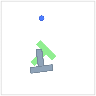

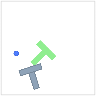

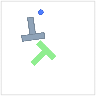

In [ ]:
from IPython.display import Image, display
display(Image(filename='../assets/demo1.gif'))
display(Image(filename='../assets/demo2.gif'))
display(Image(filename='../assets/demo3.gif'))

##### Push-T Demonstration Dataset

We will be using a dataset of demonstrations where a point agent pushes a T-shaped block onto a T-shaped outline.  A visualization of a few of these demonstrations is shown above.  Here we will define a few characteristics of the dataset.

Dataset Characteristics:
- Total Demonstrations = 206
- Maximum Demonstration Length = 246 timesteps
- Action Dimension = 2 (agent_x, agent_y)
- State Dimension = 5 (agent_x, agent_y, block_x, block_y, block_rotation)
- Reward = fraction of T-shaped outline covered by T-shaped block (min = 0, max = 1)

In [ ]:
import os
import gdown

# Download the dataset
dataset_path = "robotics/push_t_dataset.zarr"
if not os.path.isfile(dataset_path):
    id = "1KY1InLurpMvJDRb14L9NlXT_fEsCvVUq&confirm=t"
    gdown.download(id=id, output="robotics/push_t_dataset.zarr.zip", quiet=False)

    # unzip the downloaded file
    !unzip -q robotics/push_t_dataset.zarr.zip -d robotics/push_t_dataset.zarr
    !rm robotics/push_t_dataset.zarr.zip

Downloading...
From: https://drive.google.com/uc?id=1KY1InLurpMvJDRb14L9NlXT_fEsCvVUq&confirm=t
To: /content/drive/MyDrive/homework4/part2-DiffusionModels/robotics/push_t_dataset.zarr.zip
100%|██████████| 31.1M/31.1M [00:00<00:00, 151MB/s]


replace robotics/push_t_dataset.zarr/.zattrs? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


2.4.1 Constructing the Training Dataset [2 points]

In order to train the diffusion model, we need to get our demonstrations in the correct format.  Remember, our goal is for the diffusion model to learn $q(a|s)$, the distribution of actions given the current state.  So the model inputs are actions and the conditioning terms are states.  Naively, we would turn a demonstration of length L into L different data points.  Each datapoint would have one action and one state that it is conditioned on.

In practice, we do not predict one action at a time, we predict a sequence of actions.  This is known as action chunking in the robotics literature (https://arxiv.org/abs/2304.13705).  Additionally, it is common to condition on multiple previous states, not just the current state (we can't condition on future states because they haven't happened yet).  For this assignment, we want the diffusion model to be conditioned on $H_s$ states and we want the model to generate $H_a$ actions at a time ($H_s < H_a$).


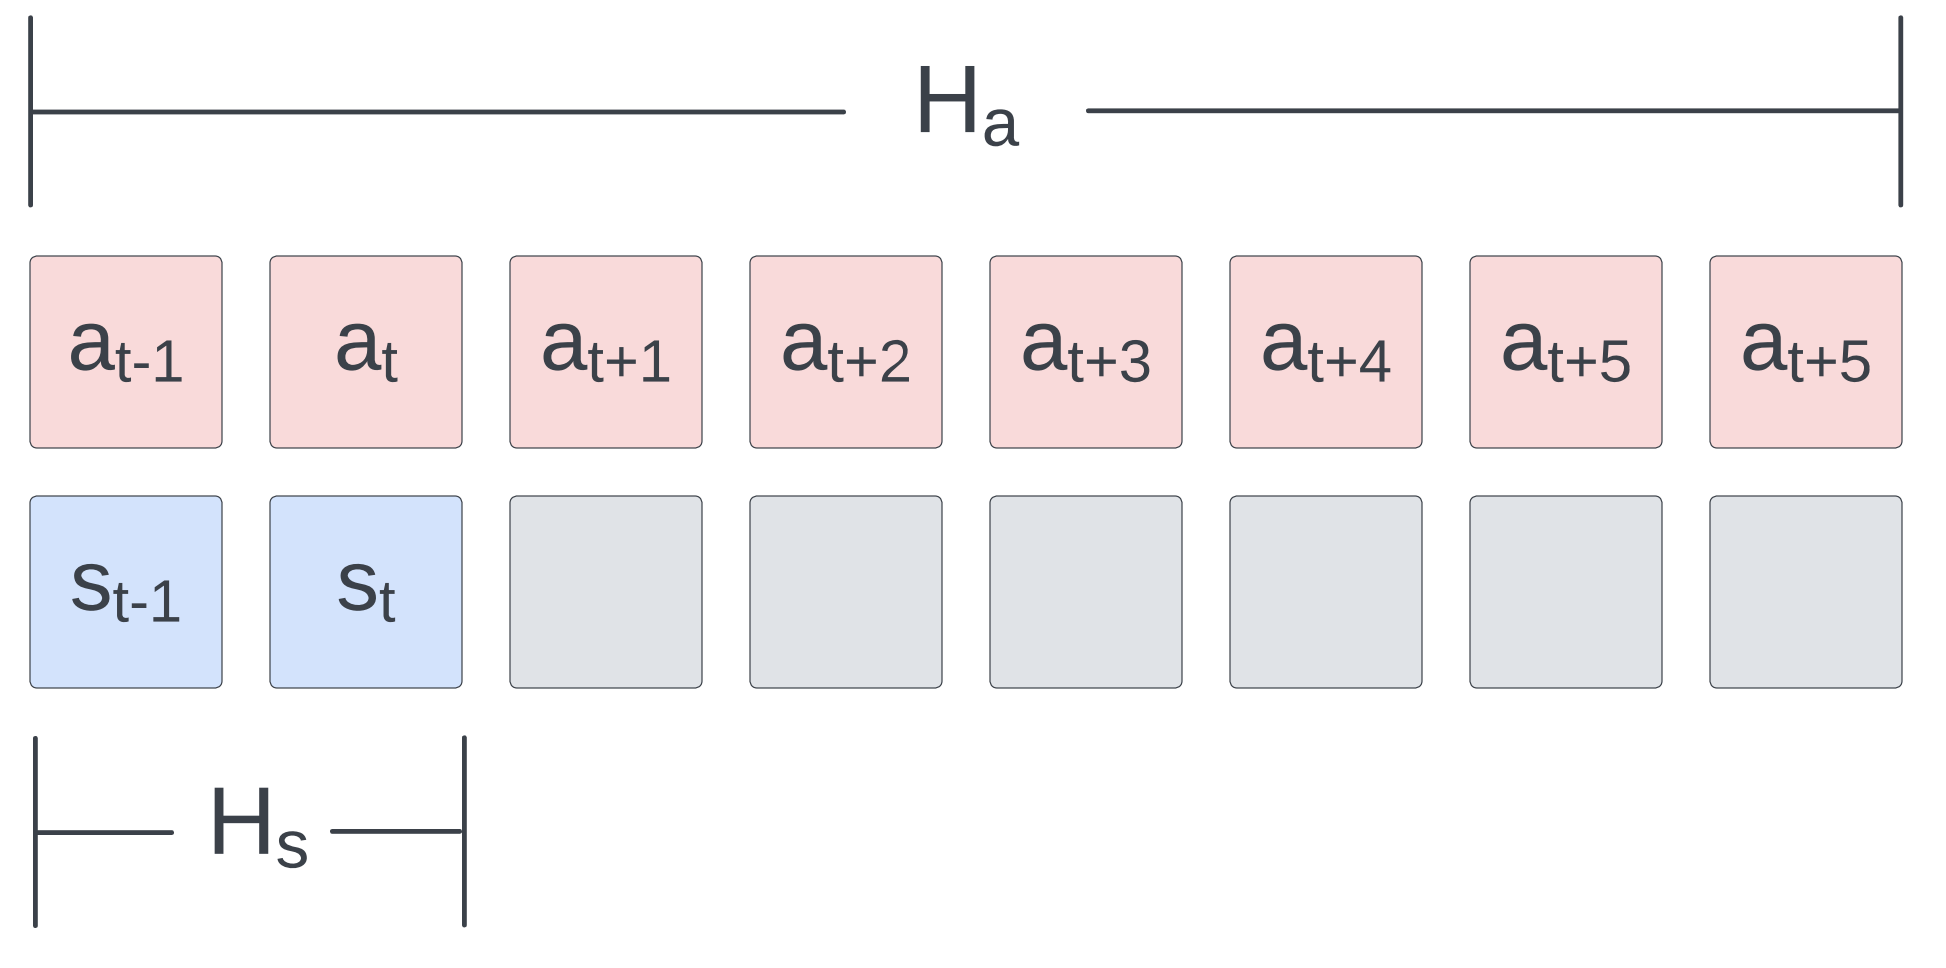

But what if we are at the beginning of a demonstration where $s_{0-x}$ and $a_{0-x}$ do not exist?  Then you should repeat $s_0$ and $a_0$ for the appropriate number of times.  What if we are at the end of a demonstation where future states and actions do not exist?  Then you should repeat the final values for the appropriate number of times.

*TODO:* Complete the ``load_dataset`` function in ``part2-DiffusionModels/robotics/dataset.py`` \
*TODO:* Complete the initialization function in ``part2-DiffusionModels/robotics/runner.py``


In [ ]:
# test load dataset
unit_tester.test_robotics_dataset()

torch.Size([256, 8, 2])
PushTDataset() test case passed!


With the initialization and the data loading complete, you should now be able to train a diffusion based policy (this may take a while to run).  If this fails, your initialization may be incorrect.  We recommend running the training for ~20 epochs first so that you can see if your output is reasonable.  If the agent is just moving around randomly, this indicates that something is wrong with your code.  If the agent is moving the block but having a hard time getting it over the outline, then continue training for the final 30 epochs

Loss should get to ~0.05 by the end of training and be below 0.1 after 10 epochs

In [ ]:
from robotics.runner import EnvRunner

# train model
runner = EnvRunner()
runner.load_data(dataset_path='robotics/push_t_dataset.zarr/', batch_size = 256)

pygame 2.1.2 (SDL 2.0.16, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
number of parameters: 6.535322e+07
torch.Size([256, 16, 2])


In [ ]:
# You can keep running this cell to train the model for longer (50 epochs should be enough if your implementation is correct)
runner.train_policy(50)
runner.policy.save_weights('model_pths/robotics_weights.pth')

# Load the model from the checkpoint
# runner.policy.load_weights('model_pths/robotics_weights.pth')
# runner.load_data(dataset_path='robotics/push_t_dataset.zarr/', batch_size = 256)


Batch: 100%|██████████| 101/101 [00:39<00:00,  2.57it/s]

Batch: 100%|██████████| 101/101 [00:38<00:00,  2.60it/s]

Batch: 100%|██████████| 101/101 [00:39<00:00,  2.58it/s]

Batch: 100%|██████████| 101/101 [00:38<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:39<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:38<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:39<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:39<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:38<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:39<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:39<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:39<00:00,  2.58it/s]

Batch: 100%|██████████| 101/101 [00:39<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:39<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:38<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:39<00:00,  2.59it/s]

Batch: 100%|██████████| 101/101 [00:38<00:00,  2.60it/s]

Batch: 100%|█

2.4.2 Generating a Rollout [5 points for success rate] + [2 writeup point]

Now that you have a trained policy, we can generate a complete rollout.  If everything is done correctly, you should see the agent move the T-shaped block over the T-shaped outline.

To rollout a policy for T timesteps we do the following:
- Initialize Environment
- For t in range(T)
    - get action: <u> this is what you have to implement </u>
    - reward, state = env.step(action)
    - if reward == maximum_reward (unlikely to happen even if your implementation is correct)
        - break

T is set to 250 (based on the maximum demonstration length)

We have implemented most of the logic for you - your only task it to generate actions.  When predicting a horizon of actions, it is common to not actually carry out all of those predicted actions. Instead, you carry out a subset of those predicted actions in open loop and then re-plan. So if you generate $H_a$ actions, you only roll out $N_{actions} < H_a$ of those actions before generating a new set of actions.  Here is a visual representation:

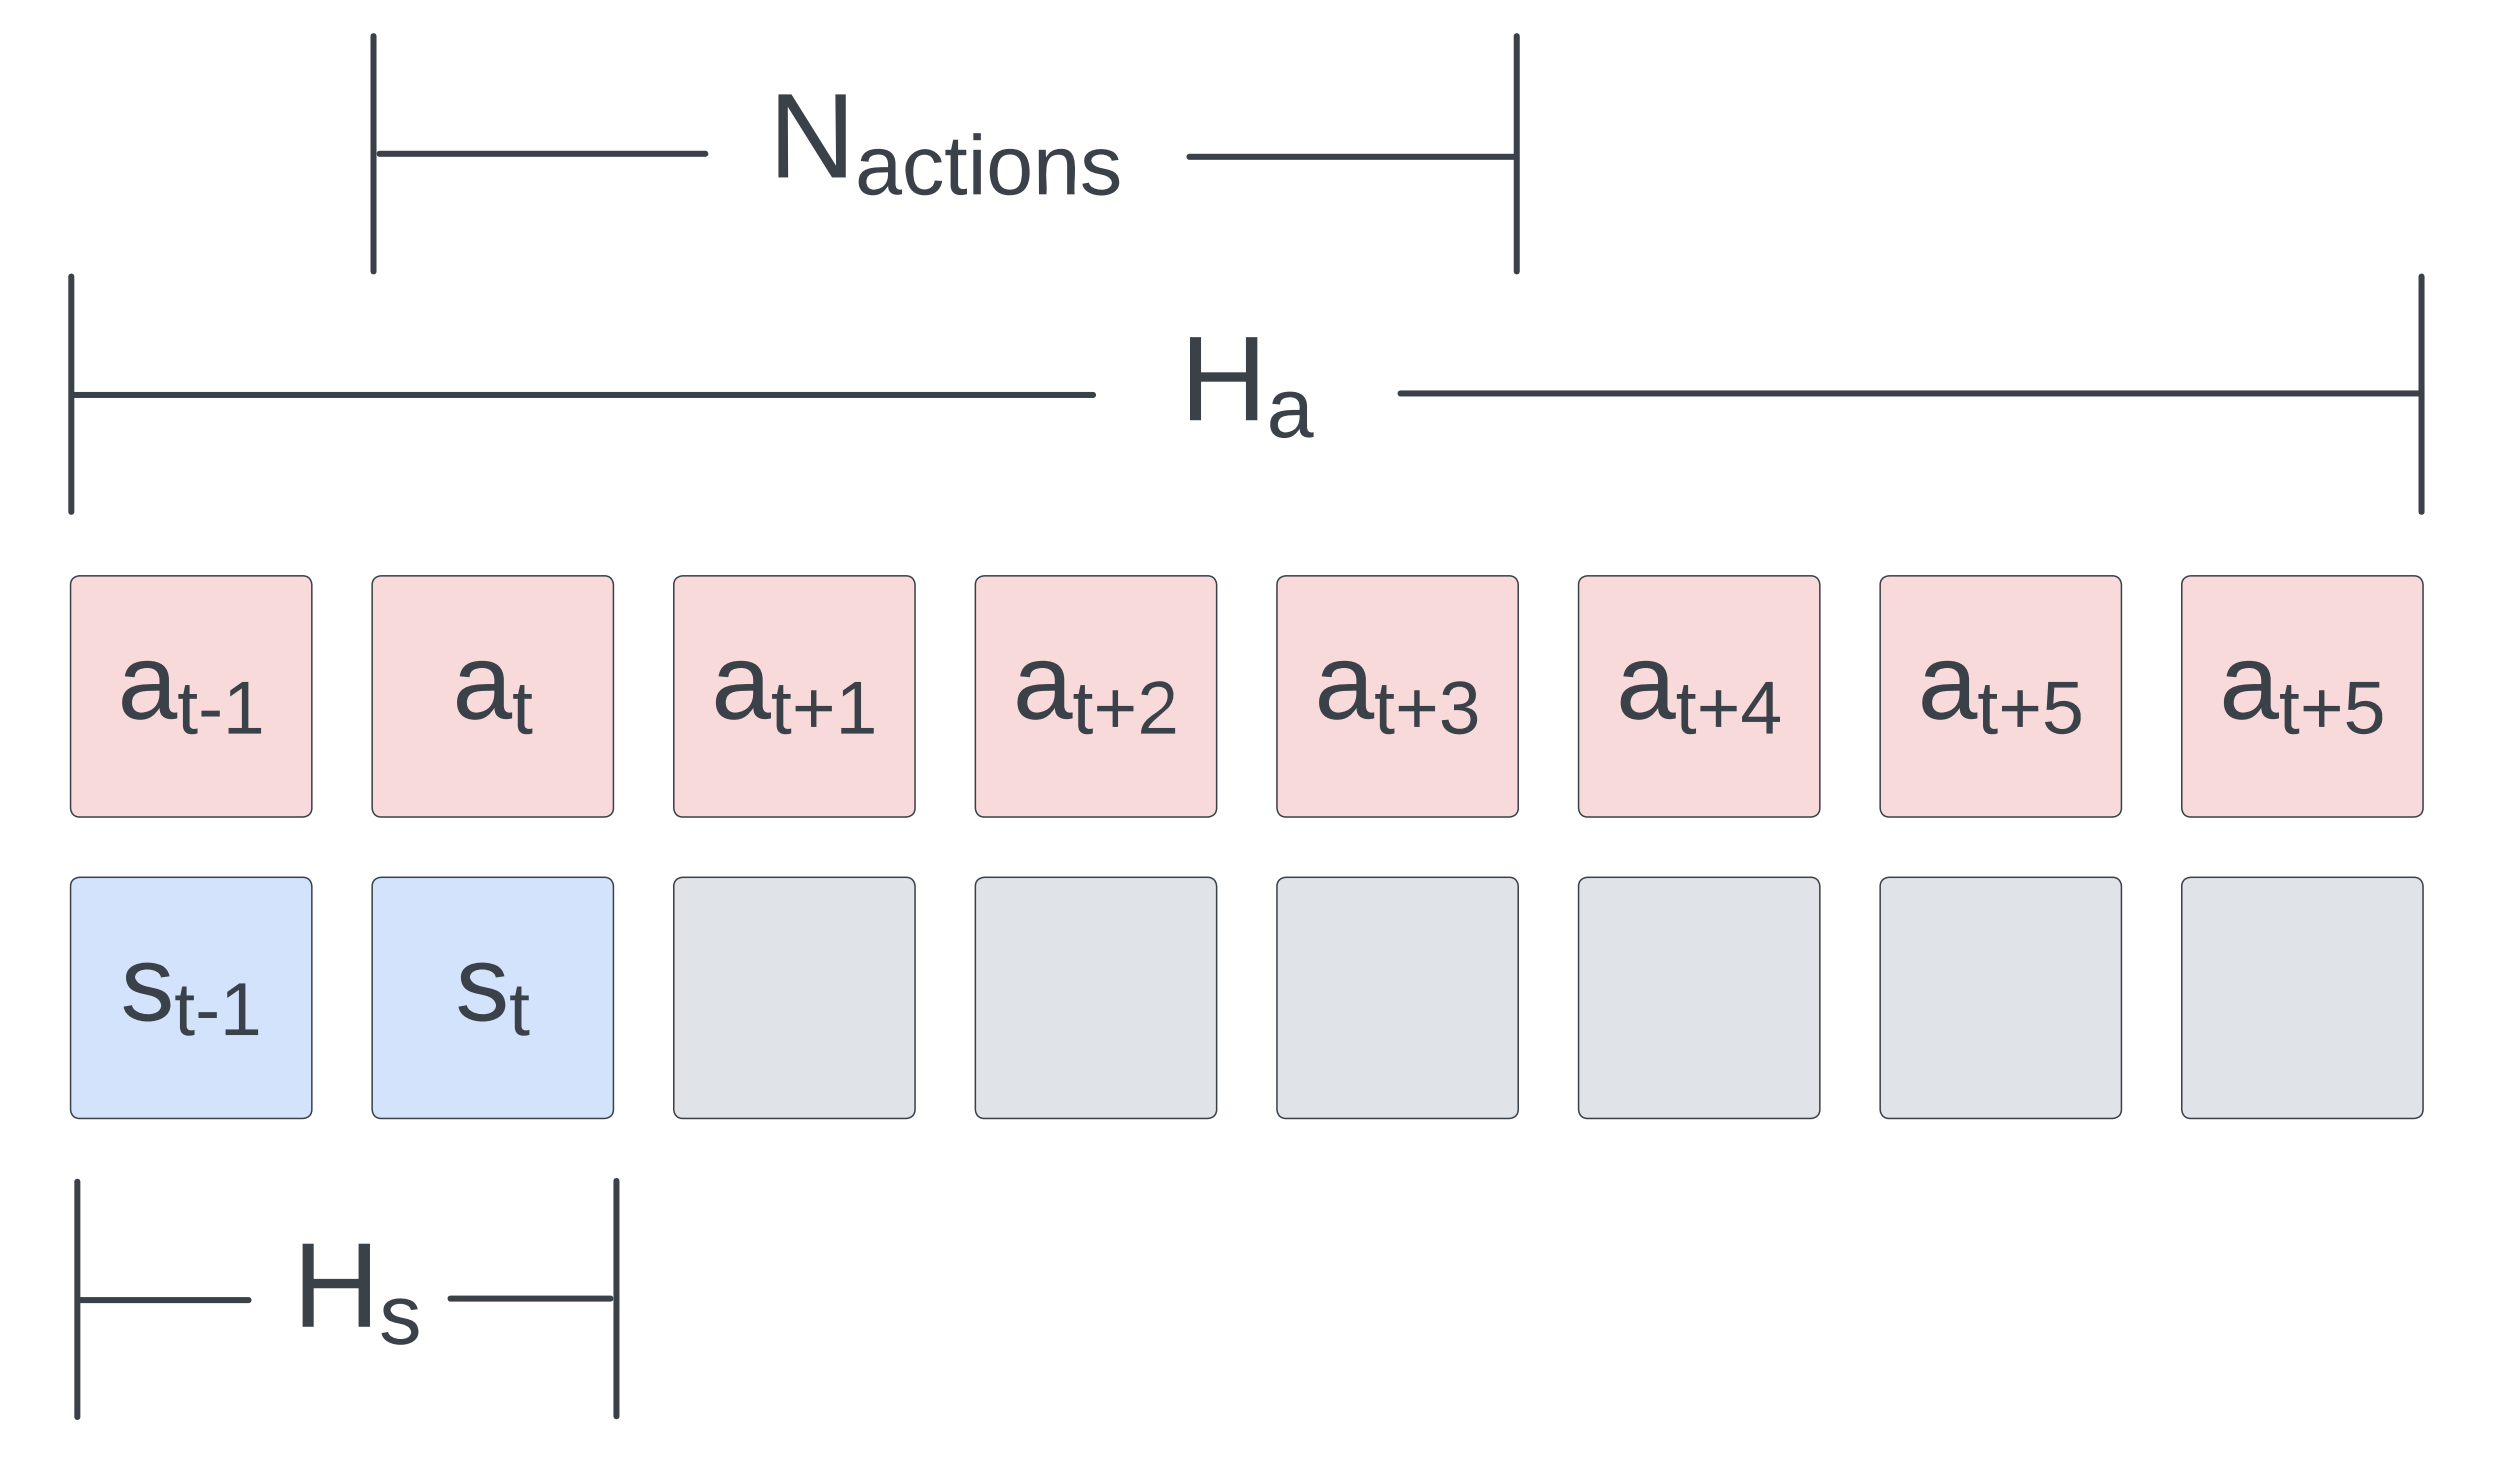

In [ ]:
runner.policy.load_weights('model_pths/robotics_weights.pth')
runner.load_data(dataset_path='robotics/push_t_dataset.zarr/', batch_size = 256)

torch.Size([256, 16, 2])


*TODO:* Complete implementation of ``run_rollout`` in ``part2-DiffusionModels/robotics/runner.py`` \
*Note:* We want the guidance weight to be zero

_Hint:_ We generate $H_a$ actions at a time, and carry out $N_{actions}$ of those actions.  So you should not actually be generating actions at every timestep

In [ ]:
# generate rollout
imgs, max_images = runner.run_rollout()

Eval PushTStateEnv: 252it [01:23,  3.01it/s, reward=0.664]

Max reward: 0.7595633561588307


To get full credit for this section your maximum reward should be greater than 0.7

There is definitly an element of randomization with diffusion models, so if the movement is reasonable feel free to run the rollout again or train for a little longer.

In [ ]:
# Video of the rollout to help you debug
from skvideo.io import vwrite
from IPython.display import Video
vwrite('vis.mp4', imgs)
Video('vis.mp4', embed=True, width=256, height=256)

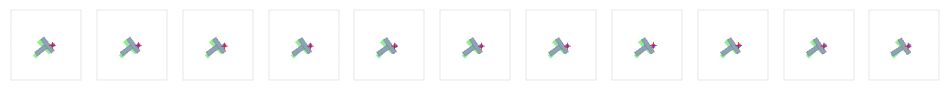

In [ ]:
# Images of the timesteps leading up to max reward (so we can see that it did not just randomly reach the goal)

# Plot images in a row
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, len(max_images), figsize=(12, 8))
for i in range(len(max_images)):
    axes[i].imshow(max_images[i])
    axes[i].axis('off')

<u> Question:</u>. What did you learn from training this model?  Did you notice any interesting behavior?  Even if you never got a high reward, where did you notice the agent failing?

<u> Your Answer:</u> I learned how the diffusion model can solve a wide variety of tasks and how it predicts actions in the context of robotics. I noticed how the agent performs more erratically if we carry out all the predicted actions. I noticed the agent struggled to get the T exactly in the outline. It did well to get it close within the boundary and in the general area

### Part 3 - Experiments [Extra Credit - 3 points max]

This section is very open ended, it is your chance to experiment with the models you have created and earn some extra credit points.  Be creative!  We are looking for interesting analysis and visualization.  The more effort you put into this section, the more points you can get.
\
\
Suggestions for conducting a good experiment:
- Be systematic and scientific
    - Clearly state the variable you will changing
    - Define an evaluation metric
    - Come up with a hypotheses (why might changing these values even matter)?
    - Do a reasonable sweep over parameter values (does not need to be too extensive)
- Visualizations
    - Graphs, pictures, and rollout videos are easier to digest than tables of numbers
- Analysis
    - Don't just report the results, think about what they mean
    - Is the behavior what you expected?
    - What additional questions does this leave you with?
    - What did you learn (even if your experiment failed or is only partially completed)?

We will be sure to shout out the best experiments in a Piazza post!

#### Collect Submission

Run the following cell to collect ```hw4_submission_p2.zip```.  You will submit this to HW4 Code - Part 2 on gradescope.  Make sure to also export a PDF of this jupyter notebook and attach that to the end of your theory section.  This PDF must show your answers to all the questions in the document, please leave in all the photos that you generate as well.  You will not be given credit for anything that is not visible to us in this PDF.

In [ ]:
!ls

collect_submission_part2.sh  __init__.py	      noise_scheduler.py  robotics
computer_vision		     model_pths		      __pycache__	  tests.py
diffusion_model.py	     noise_prediction_net.py  randomizer.py


In [ ]:
%%bash collect_submission_part2.sh

  adding: diffusion_model.py (deflated 77%)
  adding: noise_prediction_net.py (deflated 79%)
  adding: noise_scheduler.py (deflated 75%)
  adding: randomizer.py (deflated 58%)
  adding: robotics/dataset.py (deflated 76%)


*Contributers*
- Matthew Bronars (Lead)
- Manav Agrawal
- Mihir Bafna